In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")

Yêu Cầu:

-Biểu đồ đường thể hiện doanh thu theo từng tháng năm 2011.

-Biểu đồ cột thể hiện số lượng đơn hàng trong các tháng của năm 2011.   

In [9]:
# chuyển InvoicceDate thành datatime object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

d1 = df[['InvoiceNo','InvoiceDate', 'Quantity', 'UnitPrice']]

# Lấy các cột dữ liệu cần thiết
#tính doanh thu trên mỗi row
d1['Revenue'] = d1['Quantity'] * d1['UnitPrice'] 
#chuyển mỗi giá trị InvoiceDate thành index của mỗi để search theo index
d1 = d1.set_index(['InvoiceDate']) 

#Lọc  những hàng mà index có chưa 2011
d2 = d1['2011']
d2 = d2.reset_index()

#Tính tổng doanh thu theo tháng
d3 = d2.groupby(by = d2['InvoiceDate'].dt.month).sum()

d4 = d1.drop_duplicates(subset = 'InvoiceNo', keep = 'first')
#Xóa bỏ các dòng trùng lặp của cùng 1 đơn hàng
d4 = d4['2011']
d4 = d4.reset_index()

#Đếm số đơn hàng trong tháng
d5 = d4.groupby(by = d4['InvoiceDate'].dt.month).count()


C:\Users\HUYEND~1.611\AppData\Local\Temp/ipykernel_5532/3435187346.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Revenue'] = d1['Quantity'] * d1['UnitPrice']
C:\Users\HUYEND~1.611\AppData\Local\Temp/ipykernel_5532/3435187346.py:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  d2 = d1['2011']
C:\Users\HUYEND~1.611\AppData\Local\Temp/ipykernel_5532/3435187346.py:21: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` inste

No handles with labels found to put in legend.


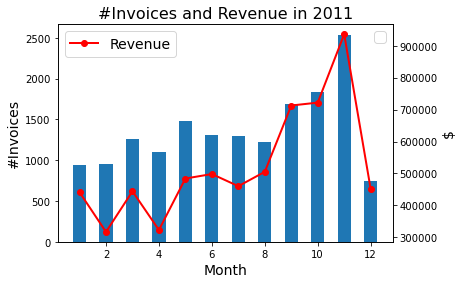

In [17]:
# Vẽ biểu đồ kết hợp
x = d5.index.get_level_values(0)
plt.bar(x, d5['InvoiceNo'], width = 0.5)
axes1 = plt.gca()
axes2 = axes1.twinx()
axes2.plot(x, d3['Revenue'], label = 'Revenue', linewidth = 2, c = 'r', marker = 'o')
axes1.set_xlabel('Month', fontsize = 14)
axes1.set_ylabel('#Invoices', fontsize = 14)
axes2.set_ylabel('$', fontsize = 14)

axes1.legend(fontsize = 14)
axes2.legend(fontsize = 14)
plt.title('#Invoices and Revenue in 2011', fontsize = 16)
plt.show()

Nhận xét:

-Tháng 4 có tổng số đơn hàng nhiều hơn tháng 2. Tuy nhiên tổng doanh thu thì chỉ tương đương.

-Tháng 9, 10, 11 tổng số đơn hàng nhiều và tổng doanh thu cũng tăng nhanh chóng.

-Số đơn hàng tăng vọt vào tháng 11 (cao nhất trong năm) nhưng t12 ngay sau đó số đơn hàng lại giảm sâu (thấp nhất trong năm).